In [16]:
import pymysql
import pandas as pd
import numpy as np
import ssl
import certifi
from urllib.request import urlopen
import json
from tqdm import tqdm
from datetime import datetime, date
import calendar
from urllib.error import HTTPError
import time
from sqlalchemy import create_engine
from pandas.tseries.offsets import MonthEnd
import sqlalchemy

In [2]:
def get_adata_quarter(adata, data_name):

    data = adata.pivot_table(index='date', columns='permno', values= data_name).astype('float')
    # data = data.fillna(method='ffill', limit=2)
    data = data.loc[[x for x in data.index if x.month % 3 == 2]].reindex(data.index).ffill(limit=2).dropna(how='all')

    return data

In [3]:
today_dt = datetime.today().strftime("%Y-%m-%d")
print(today_dt)

2025-05-30


In [11]:
apath = r"C:\Users\MetaM\PycharmProjects\investment\investment\US_Model\US_data\adata_2025-05-29.csv"
qpath = r"C:\Users\MetaM\PycharmProjects\investment\investment\US_Model\US_data\qdata_2025-05-30.csv"
mpath = r"C:\Users\MetaM\PycharmProjects\investment\investment\US_Model\US_data\mdata_2025-05-29.csv"
fpath = r"C:\Users\MetaM\PycharmProjects\investment\investment\US_Model\US_data\fundq_2025-05-30.csv"

In [5]:
# CSV 경로 지정
us_data_path_q = qpath
 
# 데이터 불러오기 및 전처리
fundq = pd.read_csv(us_data_path_q)
fundq['date'] = pd.to_datetime(fundq['edate']) + MonthEnd(0)
qdata = fundq
# 
# 결측치 보간
qdata_re = qdata.ffill(limit=2).ffill(limit=1)
# 
# NaN만 None으로 바꾸는 메모리 절약형 처리
processed_qdata = qdata_re.where(pd.notnull(qdata_re), None)
# 
# # host_num = '192.168.0.230'
host_num = 'hystox74.synology.me'
port=3307 
user='stox7412'
passwd='Apt106503!~'
db='investar'
 
# SQLAlchemy를 이용한 엔진 생성
engine = create_engine(f'mysql+pymysql://{user}:{passwd}@{host_num}:{port}/{db}')
# 
# 데이터베이스에 저장
processed_qdata.to_sql(name='US_fundq', con=engine, if_exists='replace', index=False)
# 
print("✅ US_fundq 테이블에 데이터 업로드 완료")


✅ US_fundq 테이블에 데이터 업로드 완료


In [20]:
# import sqlalchemy

# CSV 경로 지정
us_data_path_m = mpath
 
# 데이터 불러오기 및 전처리
fundm = pd.read_csv(us_data_path_m)


# date 컬럼을 datetime으로 변환
fundm['date'] = pd.to_datetime(fundm['date'], errors='coerce')
fundm['edate'] = pd.to_datetime(fundm['edate'], errors='coerce')

# 데이터베이스 연결 정보
host_num = 'hystox74.synology.me'
port=3307 
user='stox7412'
password ='Apt106503!~'
database ='investar'
table_name = 'US_fundm'

# SQLAlchemy를 이용한 연결 문자열 생성
connection_str = f"mysql+pymysql://{user}:{password}@{host_num}:{port}/{database}"
engine = sqlalchemy.create_engine(connection_str)

# 데이터 업로드
fundm.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

257676

In [21]:
# CSV 경로 지정
us_data_path_a = apath
 
# 데이터 불러오기 및 전처리
funda = pd.read_csv(us_data_path_a)

funda.head(20)

# 날짜 컬럼 변환
funda['date'] = pd.to_datetime(funda['date'], errors='coerce')

# DB 연결 정보
host_num = 'hystox74.synology.me'
port=3307 
user='stox7412'
password ='Apt106503!~'
database ='investar'
table_name = 'US_funda'

# SQLAlchemy 연결 엔진 생성
connection_str = f"mysql+pymysql://{user}:{password}@{host_num}:{port}/{database}"
engine = sqlalchemy.create_engine(connection_str)

# DB 업로드
funda.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

1374720

In [17]:
# CSV 경로 지정
us_data_path_f = fpath 
 
# 데이터 불러오기 및 전처리
fundqq = pd.read_csv(us_data_path_f)

# fundqq.head(20)

# 날짜 컬럼 변환
fundqq.rename(columns={'edate': 'date'}, inplace=True) 
fundqq['date'] = pd.to_datetime(fundqq['date'], errors='coerce')

# DB 연결 정보
host_num = 'hystox74.synology.me'
port=3307 
user='stox7412'
password ='Apt106503!~'
database ='investar'
table_name = 'US_FS_qdata'

# SQLAlchemy 연결 엔진 생성
connection_str = f"mysql+pymysql://{user}:{password}@{host_num}:{port}/{database}"
engine = sqlalchemy.create_engine(connection_str)

# DB 업로드
fundqq.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

print("✅ 테이블에 데이터 업로드 완료")

✅ 테이블에 데이터 업로드 완료


In [8]:
# MySQL 연결 정보 설정
host_num = 'hystox74.synology.me'
# host_num = '192.168.0.230'
cnx = pymysql.connect(
    host=host_num,
    port=3307,
    user='stox7412',
    passwd='Apt106503!~',
    db='investar',
    autocommit=True
)
cursor = cnx.cursor()

# SQL 쿼리: 2005년 1월 1일 이후의 데이터 추출
query = '''
    SELECT *
    FROM US_fundq
    WHERE date >= '2006-01-01'
'''

# SQL 쿼리 실행 및 데이터프레임으로 변환
df = pd.read_sql(query, cnx)

# MySQL 연결 종료
cnx.close()

C:\Users\MetaM\AppData\Local\Temp\ipykernel_11100\2044518195.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [9]:
df[df['tic'] == 'UI'][['date', 'saleq']].head(12)

,date,saleq
121012,2008-09-30,NaN
131691,2008-12-31,0.026
142551,2009-03-31,1.159
153413,2009-06-30,1.625
164200,2009-09-30,18.842
174836,2009-12-31,36.294
185849,2010-03-31,41.517
196857,2010-06-30,40.299
207798,2010-09-30,34.082
218581,2010-12-31,45.087


In [10]:
qdata = df
# qdata['permno'] = qdata['permno'].astype('int')
# 
# # qdata = qdata.ffill(limit=2)
# #
# qdata['siccd'] = qdata['siccd'].apply(lambda x: np.nan if np.isnan(x) else int(x))
# #
# 
# # 한국, 미국데이터 공통 전처리
# 
# util_and_fin = list(range(4900, 4950)) + list(range(6000, 7000)) # 유틸리티, 금융업 제외 (한국은 금융업만 제외)
# qdata = qdata[~qdata['siccd'].isin(util_and_fin)]
# 
# permno_list = sorted(list(set(qdata['permno'])))
# print(len(permno_list))
# 
# qdata = qdata[qdata['permno'].isin(permno_list)]
# 
# qdata = qdata[qdata['naics'] != 522110]


In [11]:
def get_qdata(df: pd.DataFrame, value_col: str):
    """
    'tic' 값이 알파벳 4자 이하로 구성된 종목만 필터링한 뒤,
    'date'를 인덱스로 하고 'tic'을 컬럼으로, value_col을 값으로 하는 피벗 테이블을 반환합니다.
    
    Parameters:
        df (pd.DataFrame): 원본 데이터프레임 (칼럼에 'date', 'tic', value_col 포함)
        value_col (str): 피벗 테이블에서 값으로 사용할 열 이름
        
    Returns:
        pd.DataFrame: 처리된 피벗 테이블 (결측치 2단계 ffill 포함)
    """
    # 'tic'이 NaN이 아니고 알파벳만으로 1~4글자인 경우 필터
    filtered_df = df[df['tic'].notna() & df['tic'].str.fullmatch(r'[A-Za-z]{1,4}')]

    # 피벗 테이블 생성
    pivot_df = filtered_df.pivot_table(index='date', columns='tic', values=value_col).astype(float)

    # 결측값 보간
    pivot_df = pivot_df.fillna(method='ffill', limit=2)

    return pivot_df


In [12]:
sale = get_qdata(df, 'saleq')

In [13]:
cogs = get_qdata(df, 'cogsq')
gp = sale - cogs
xsga = get_qdata(df, 'xsgaq')
xrd = get_qdata(df, 'xrdq')
xint = get_qdata(df, 'xintq')
op = get_qdata(df,'xintq')
pi = get_qdata(df, 'piq')     # pretax income
tax = get_qdata(df, 'txtq')   # income tax
xido = get_qdata(df, 'xidoq')# extraordinary item and discontinue
ni = get_qdata(df, 'ibq')
nix = get_qdata(df, 'niq')
fi = nix + xint.replace(np.nan, 0)

#Cash flow statement
capx = get_qdata(df, 'capxy')                          # capex
capex_sale = capx.divide(sale.replace(0, np.nan), axis=0)
ocf = get_qdata(df, 'oancfy')
fcf = ocf - capx
eqbb = get_qdata(df, 'prstkcy')                        # 자사주 매입
eqis = get_qdata(df, 'sstky')                          # 자사주 매각
eqnetis = eqis.replace(np.nan, 0) - eqbb.replace(np.nan, 0).shift(1)

dltnetis = get_qdata(df, 'dltisy')                 # 장기채권 발행
dstnetis = get_qdata(df, 'dlcchy')                 # 유동채권 변화
dbnetis = dltnetis - dstnetis
netis = eqnetis.replace(np.nan, 0) + dbnetis.replace(np.nan, 0)

# Balance Sheet - Assets
at = get_qdata(df, 'atq')      # 분기 자산
at = at[at > 0]
ca = get_qdata(df, 'actq')     # 분기 유동자산
rec = get_qdata(df, 'rectq')   # receivables
cash = get_qdata(df, 'cheq')   # 현금
inv = get_qdata(df, 'invtq')   # inventory
nca = at - ca
intan = get_qdata(df, 'intanq') #무형자산
ivao = get_qdata(df, 'ivaoq')   # investment
ppeg = get_qdata(df, 'ppegtq')  # porperty plant and Equipment total
ppen = get_qdata(df, 'ppentq')  # porperty plant and Equipment net

# #Balance Sheet - Liabilities
lt = get_qdata(df, 'ltq')       # 총부채
cl = get_qdata(df, 'lctq')      # 유동부채
ap = get_qdata(df, 'atq')       # asset total
debtst = get_qdata(df, 'dlcq')  # Debt in current liability
txp = get_qdata(df, 'txpq')     # Income taxes payable
ncl = lt - cl
debtlt = get_qdata(df, 'dltisy') # long term debt total
txditc = get_qdata(df, 'txdiq')  #  Income Taxes - Deferred (txdiq)

# #Balance Sheet - Financing
pstk = get_qdata(df,'pstkrq')   # 상환우선주
debt = (debtst.replace(np.nan, 0) + debtlt.replace(np.nan, 0)).replace(0, np.nan)
netdebt = debt - cash.replace(np.nan, 0)
seq = get_qdata(df, 'seqq')  # share holder equity
ceq = get_qdata(df, 'ceqq')  # common equit

# me =  get_qdata(df, 'me')

icapt = get_qdata(df, 'icaptq')  # invested capital
mib = get_qdata(df, 'mibtq')     # Noncontrolling Interests - Total - Balance Sheet (mibtq)
bev = icapt + debtst.replace(np.nan, 0) - cash.replace(np.nan, 0)
bev = bev[bev > 0]
#
#Balance Sheet - Summary
nwc = ca - cl
coa = ca - cash
col = cl - debtst.replace(np.nan, 0)
cowc = coa - col
ncoa = at - ca - ivao
ncol = lt - cl - debtlt
nncoa = ncoa - ncol

oa = coa + ncoa
ol = col + ncol
ao = get_qdata(df, 'aoq').shift(1)      #  asset other
lo = get_qdata(df, 'loq').shift(1)      # liabilities other
dp = get_qdata(df, 'dpq').shift(1)
noa = oa - ol
lnoa = ppen + intan + ao - lo + dp
aliq = cash + 0.75*coa + 0.5*(at - ca - intan.replace(np.nan, 0))

be = at - lt
be = be[be > 0]

roeq = ni.divide(be.replace(0, np.nan), axis=0)
roaq = ni.divide(at.replace(0, np.nan), axis=0)

#Market based
oacc = ni - ocf

# mev = me + netdebt
# mev = mev[mev > 0]
# mev_jun = mev.loc[[x for x in mev.index if x.month == 6]].reindex(mev.index).ffill(limit=11).dropna(how='all')

#Accounting Characteristics

##Accounting based size measures
assets = at
sales = sale
book_equity = be
net_income = ni
# enterprise_value = mev
# mat = at + be + me

In [14]:
def process_yoy_growth(result_df: pd.DataFrame) -> pd.DataFrame:
    """
    전년동기대비 증가율 기준으로 흑자 기업 필터링 및 정렬하는 함수
    
    Parameters:
        result_df (pd.DataFrame): 피벗된 분기별 순이익 데이터프레임 (index: date, columns: tic)
        
    Returns:
        pd.DataFrame: 증가율 기준 내림차순으로 정렬된 결과
    """
    # 분기 데이터는 월 기준이므로 전년 동기 = 4분기 전
    prev_q = result_df.shift(0)
    yoy_q = result_df.shift(12)

    # 두 기준 모두 0 이상인 경우만 유지
    condition = (prev_q >= 0) & (yoy_q >= 0)
    positive_df = result_df[condition]

    # 전년동기 대비 증가율 계산: (이번 분기 - 전년동기) / abs(전년동기)
    yoy_growth = (result_df - yoy_q) / yoy_q.abs()

    # inf 제거
    yoy_growth = yoy_growth.replace([np.inf, -np.inf], np.nan)

    # 전년동기 증가율에서 위의 positive 조건 만족하는 부분만 남김
    valid_growth = yoy_growth[condition]

    # 마지막 분기만 추출
    latest_date = valid_growth.index.max()
    latest_growth = valid_growth.loc[latest_date].dropna()

    # 순위 매기기
    ranked = latest_growth.sort_values(ascending=False).to_frame(name='yoy_growth')
    ranked['rank'] = ranked['yoy_growth'].rank(ascending=False, method='first').astype(int)

    return ranked

In [15]:
op_rank =  process_yoy_growth(pi)

In [16]:
op_rank[(op_rank['yoy_growth'] >= 0.2) & (op_rank['yoy_growth'] <= 0.5)]

,yoy_growth,rank
tic,,
REPX,0.499471,611
HALO,0.497771,612
NWBI,0.497668,613
MYFW,0.496787,614
PRG,0.496214,615
...,...,...
BMNM,0.201639,986
EZPW,0.201075,987
PSK,0.201051,988


### 기업 일반정도 데이터 추가

In [17]:
# JSON 데이터를 불러오는 함수
def get_jsonparsed_data(url):
    context = ssl.create_default_context(cafile=certifi.where())  # SSLContext 생성
    with urlopen(url, context=context) as response:  # SSLContext 사용
        data = response.read().decode("utf-8")
        return json.loads(data)

# 데이터 가져오기
url = "https://financialmodelingprep.com/api/v3/stock/list?apikey=hT0gAk87j9xZx4PlBApvBqfVL5IahvgV"
stock_list = get_jsonparsed_data(url)

# DataFrame으로 변환
stock_listed = pd.DataFrame(stock_list)

# 고유한 exchangeShortName 확인
stock_listed['exchangeShortName'].unique().tolist()

# 조건 설정
con1 = stock_listed['exchangeShortName'] == 'NASDAQ'
con2 = stock_listed['exchangeShortName'] == 'NYSE'
con3 = stock_listed['exchangeShortName'] == 'AMEX'
con4 = stock_listed['type'] == 'stock'

# 조건 필터링
stock_screen1 = stock_listed[con1 | con2 | con3].copy()

# 조건에 따른 필터링 수행 시 인덱스 정렬
con4_aligned = con4.reindex(stock_screen1.index)  # 인덱스를 정렬하여 일치시킴
stock_screen2 = stock_screen1[con4_aligned].copy()

us_stock_info = stock_screen2

ticker_list = us_stock_info['symbol'].unique().tolist()
len(ticker_list)

11505

In [18]:
op_rank_ticker = op_rank.index.tolist()
common_ticker = list(set(op_rank_ticker) & set(ticker_list))

In [19]:
len(common_ticker)

1938

In [20]:
info_list = []

for tick in tqdm(common_ticker, desc="Downloading stock profiles"):
    url = f"https://financialmodelingprep.com/api/v3/profile/{tick}?apikey=hT0gAk87j9xZx4PlBApvBqfVL5IahvgV"

    try:
        info_raw = get_jsonparsed_data(url)
        if info_raw:
            temp_info = pd.DataFrame(info_raw)
            info_list.append(temp_info)

    except HTTPError as e:
        if e.code == 429:
            print(f"Rate limit exceeded at {tick}. Sleeping for 60 seconds...")
            time.sleep(60)  # 혹은 더 짧게 10~20초
            continue
        else:
            print(f"HTTPError for {tick}: {e}")
            continue

    except Exception as e:
        print(f"Error fetching {tick}: {e}")
        continue

    time.sleep(0.2)  # 요청 간 200ms 딜레이로 속도 제한 회피

# 리스트가 비어있지 않을 경우에만 concat
if info_list:
    info = pd.concat(info_list, ignore_index=True)
else:
    info = pd.DataFrame()

In [27]:
info.to_csv(f'screened_us_stock_data_{today_dt}.csv')

In [20]:
info.rename(columns={'symbol' : 'tic'}, inplace=True)
op_rank_re = op_rank.reset_index()
merged_df = pd.merge(op_rank_re, info, on='tic', how='inner')
filter_df = merged_df[(merged_df['sector'] != 'Financial Services') & (merged_df['sector'] != 'Real Estate')]
filter_df = filter_df[~filter_df['industry'].str.contains('Regulated')]
filter_df[(filter_df['yoy_growth'] >= 0.2) & (filter_df['yoy_growth'] <= 0.5)]

<Axes: xlabel='date'>

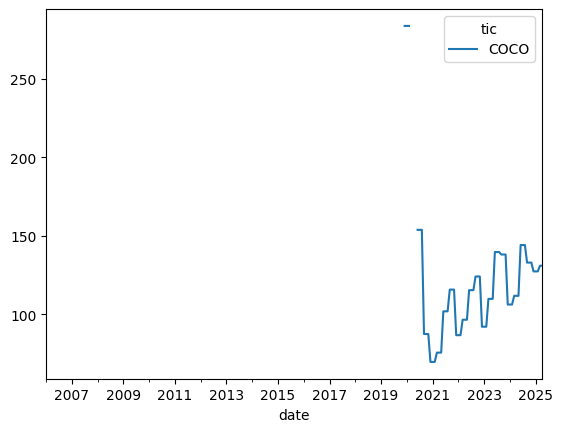

In [21]:
sale[['COCO']].plot()

<Axes: xlabel='date'>

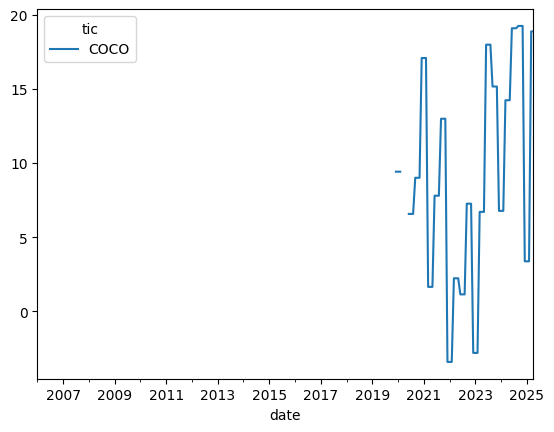

In [22]:
ni[['COCO']].plot()

In [18]:
def get_unique_values(df, ticker_name):
    unique_values = df[df['ticker'] == ticker_name]['permno'].unique() # unique 값 추출
    return unique_values.tolist()  # 리스트로 변환

permno_number = get_unique_values(qdata, 'NSC')

sale[permno_number].plot()

KeyError: 'ticker'

In [ ]:
permno_number

In [21]:
qdata[qdata['ticker'] == 'AAPL'][['date','saleq']].tail(12)

,date,saleq
869091,2024-02-29,119575.0
874279,2024-03-31,90753.0
879391,2024-04-30,90753.0
883963,2024-05-31,90753.0
888530,2024-06-30,85777.0
893079,2024-07-31,85777.0
897610,2024-08-31,85777.0
902122,2024-09-30,85777.0
906625,2024-10-31,94930.0
911065,2024-11-30,94930.0


In [15]:
sale

permno,0,10019,10025,10026,10028,10032,10042,10044,10051,10066,...,93422,93423,93426,93428,93429,93430,93432,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,NaN,192.760,108.571,14.907,328.306,1.086,8.126,149.194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-30,NaN,NaN,192.760,108.571,14.907,328.306,1.086,8.126,149.194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-31,NaN,NaN,192.760,108.571,14.907,328.306,1.086,8.126,149.194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,NaN,NaN,193.251,112.044,9.721,337.911,0.593,6.768,140.445,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.543,NaN,NaN,439.957,45.297,960.751,NaN,6.407,NaN,6.117,...,NaN,NaN,77.359,NaN,NaN,NaN,NaN,NaN,NaN,25500.0
2024-10-31,0.543,NaN,NaN,439.957,45.297,960.751,NaN,6.407,NaN,6.117,...,NaN,NaN,77.359,NaN,NaN,NaN,NaN,NaN,NaN,25500.0
2024-11-30,0.543,NaN,NaN,439.957,45.297,960.751,NaN,6.407,NaN,6.117,...,NaN,NaN,77.359,NaN,NaN,NaN,NaN,NaN,NaN,25500.0


In [32]:
sale[permno_number].tail(12)

permno,14593
date,
2023-10-31,81797.0
2023-11-30,81797.0
2023-12-31,89498.0
2024-01-31,89498.0
2024-02-29,89498.0
2024-03-31,119575.0
2024-04-30,119575.0
2024-05-31,119575.0
2024-06-30,90753.0


In [34]:
qdata[qdata['ticker'] == 'AAPL']

,permno,edate,date,dlret,dlretx,exchcd,naics,permco,prc,ret,...,xrdq,xsgaq,capxy,chechy,dlcchy,dltisy,fincfy,oancfy,prstkcy,sstky
224,14593,2006-01-31,2006-01-31,NaN,NaN,3,334111.0,7,75.51,0.050355,...,182.0,814.0,82.0,659.0,0.0,0.0,283.0,283.0,0.0,134.0
3895,14593,2006-02-28,2006-02-28,NaN,NaN,3,334111.0,7,68.49,-0.092968,...,182.0,814.0,82.0,659.0,0.0,0.0,283.0,283.0,0.0,134.0
7560,14593,2006-03-31,2006-03-31,NaN,NaN,3,334111.0,7,62.72,-0.084246,...,176.0,768.0,275.0,2855.0,0.0,0.0,142.0,158.0,353.0,212.0
11215,14593,2006-04-30,2006-04-30,NaN,NaN,3,334111.0,7,70.39,0.122290,...,176.0,768.0,275.0,2855.0,0.0,0.0,142.0,158.0,353.0,212.0
14867,14593,2006-05-31,2006-05-31,NaN,NaN,3,334111.0,7,59.77,-0.150874,...,176.0,768.0,275.0,2855.0,0.0,0.0,142.0,158.0,353.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702238,14593,2024-05-31,2024-05-31,NaN,NaN,3,334220.0,7,192.25,0.130222,...,7903.0,14371.0,4388.0,3184.0,-3982.0,0.0,-61018.0,62585.0,46219.0,NaN
705276,14593,2024-06-30,2024-06-30,NaN,NaN,3,334220.0,7,210.62,0.095553,...,8006.0,14326.0,6539.0,-4102.0,-2985.0,0.0,-97035.0,91443.0,75029.0,NaN
708315,14593,2024-07-31,2024-07-31,NaN,NaN,3,334220.0,7,222.08,0.054411,...,8006.0,14326.0,6539.0,-4102.0,-2985.0,0.0,-97035.0,91443.0,75029.0,NaN
711361,14593,2024-08-31,2024-08-31,NaN,NaN,3,334220.0,7,229.00,0.032354,...,8006.0,14326.0,6539.0,-4102.0,-2985.0,0.0,-97035.0,91443.0,75029.0,NaN
